# Make 1m reference template
from w_hm3.snplist intersect 100G_EUR_Phase3

Number of SNPs in w_hm3.snplist --- 1217311

Number of SNPs in 1000G_EUR_Phase3_plink --- 9997231

Number of SNPs in both w_hm3 and 1000G_EUR_Phase3 --- 1190321

Number of SNPs in baselineLD.{}.l2.ldscore.gz --- 1190321 .

Good match! We can use these 1190321 SNPs as reference. 
However, the w_hm3.snplist file has only three columns (SNP, A1, A2). For the template we must have chrnumvec and posvec, which we should get from .bim files in 100G_EUR_Phase3. Some SNPs has flipped alleles.

Build 37.

In [19]:
df=pd.read_csv(r'H:\Dropbox\analysis\2016_09_September_19_LDScoreRegression\1000G_EUR_Phase3_plink_merged\w_hm3.snplist',sep='\t')
df['SNP'].to_csv('w_hm3', index=False,header=False)

In [26]:
# Re-save 1190321 SNPs in ref file with column names
df = pd.read_csv(r'H:\Dropbox\analysis\2016_09_September_19_LDScoreRegression\1000G_EUR_Phase3_plink_merged\w_hm3.bim',header=None,sep='\t')
df.columns=['CHR','SNP','GP','BP','A1','A2']
df.to_csv('1m.ref',index=False,sep='\t')

In [9]:
import scipy.io as sio
import pandas as pd
df = pd.read_csv(rzH:\Dropbox\analysis\2016_09_September_19_LDScoreRegression\1m\1m.ref',sep='\t')
save_dict = {'chrnumvec': df["CHR"].values,'snpidlist': df["SNP"].values,'posvec': df["BP"].values,'A1vec': df["A1"].values,'A2vec': df["A2"].values}
sio.savemat("infomat.mat", save_dict, format='5', do_compression=False, oned_as='column', appendmat=False) # takes about 10 minutes

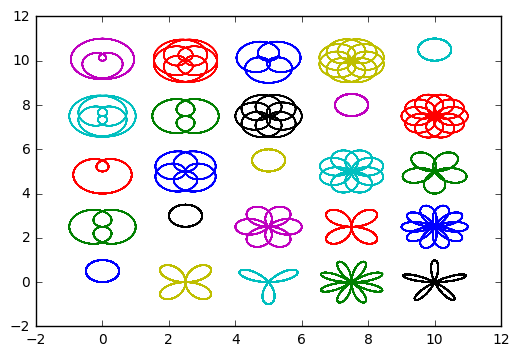

In [9]:
%matplotlib inline
import pylab as pl
import math

def rose_calc(k,m):
    n=2000
    phi = list()
    x = list()
    y = list()
    for i in range(n+1):
        phi.append(i/100*2*math.pi)
        x.append(math.sin((k+1)/(m+1)*phi[i])*math.cos(phi[i])+k*2.5)
        y.append(math.sin((k+1)/(m+1)*phi[i])*math.sin(phi[i])+m*2.5)
    return(x,y)
 
def run(nr):
    for k in range(nr):
        for m in range(nr):
            (x,y) = rose_calc(k,m)
            pl.plot(x,y)
run(5)